# Proyek Analisis Data: Air Quality Dataset (Nongzhanguan)
- **Nama:** Aska Salsabila
- **Email:** M322D4KX1731@bangkit.academy
- **ID Dicoding:** askasalsabila

## Menentukan Pertanyaan Bisnis

- What is the trend of PM 2.5 in each year?
- What are the average levels of SO2, CO, NO2, and O3 when rainfall is > 0 in each year?
- Is there a correlation between PM2.5 and PM10?

## Import Semua Packages/Library yang Digunakan

In [385]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [361]:
df_Nongzhanguan = pd.read_csv("data_Nongzhanguan.csv", sep=",")
df_Nongzhanguan

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Nongzhanguan
35060,35061,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Nongzhanguan
35061,35062,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,NW,1.1,Nongzhanguan
35062,35063,2017,2,28,22,11.0,35.0,6.0,49.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Nongzhanguan


Dropping "No" Column, because it's not important

In [362]:
df_Nongzhanguan = df_Nongzhanguan.drop(columns = 'No')
df_Nongzhanguan

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Nongzhanguan
35060,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Nongzhanguan
35061,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,NW,1.1,Nongzhanguan
35062,2017,2,28,22,11.0,35.0,6.0,49.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Nongzhanguan


### Assessing Data

Cek Missing Value

In [363]:
df_Nongzhanguan.isnull().sum()

year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

Cek Duplicate Data

In [364]:
df_Nongzhanguan.duplicated().sum()

0

Cek Info Data

In [365]:
df_Nongzhanguan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     35064 non-null  int64  
 1   month    35064 non-null  int64  
 2   day      35064 non-null  int64  
 3   hour     35064 non-null  int64  
 4   PM2.5    34436 non-null  float64
 5   PM10     34624 non-null  float64
 6   SO2      34618 non-null  float64
 7   NO2      34372 non-null  float64
 8   CO       33858 non-null  float64
 9   O3       34558 non-null  float64
 10  TEMP     35044 non-null  float64
 11  PRES     35044 non-null  float64
 12  DEWP     35044 non-null  float64
 13  RAIN     35044 non-null  float64
 14  wd       34986 non-null  object 
 15  WSPM     35050 non-null  float64
 16  station  35064 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 4.5+ MB


Describe data

In [366]:
df_Nongzhanguan.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,34436.000000,34624.000000,34618.000000,34372.000000,33858.000000,34558.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,2014.662560,6.522930,15.729637,11.500000,84.838483,108.991096,18.689242,58.097172,1324.350198,58.534682,13.671490,1012.547419,2.447535,0.064020,1.860785
std,1.177213,3.448752,8.800218,6.922285,86.225344,95.341177,24.280665,36.297740,1245.166124,58.401448,11.458418,10.266059,13.810696,0.786282,1.280368
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,2016.000000,10.000000,23.000000,17.250000,116.000000,149.000000,23.000000,80.000000,1600.000000,84.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


Cek Outlier

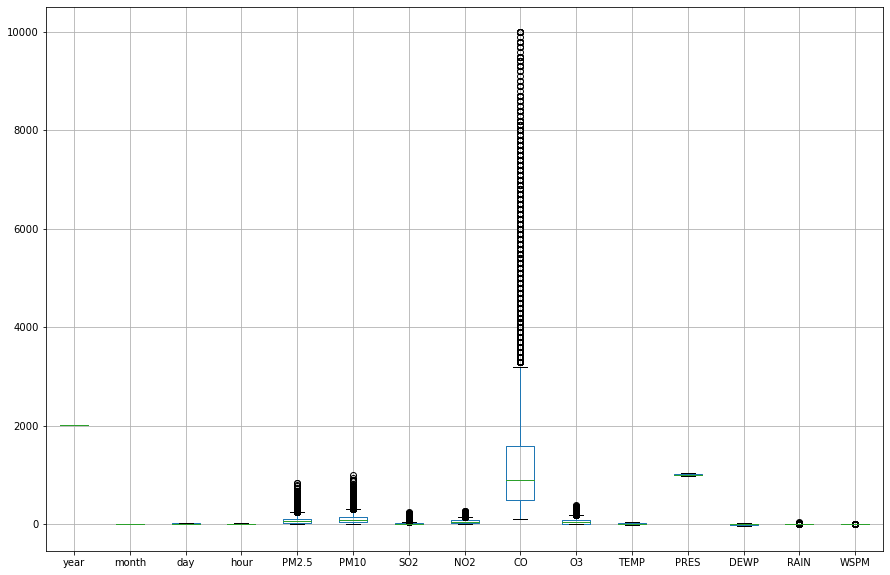

In [367]:
plt.figure(figsize=(15, 10))
df_Nongzhanguan.boxplot()
plt.show()

### Cleaning Data

PENANGANAN MISSING VALUE

In [368]:
columns_to_interpolate = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
df_Nongzhanguan[columns_to_interpolate] = df_Nongzhanguan[columns_to_interpolate].interpolate(method='linear')

In [369]:
columns_to_interpolate = ['year', 'month', 'day']
df_Nongzhanguan[columns_to_interpolate] = df_Nongzhanguan[columns_to_interpolate].interpolate(method='time')

In [370]:
df_Nongzhanguan.isnull().sum()

year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd         78
WSPM        0
station     0
dtype: int64

To handle missing values, data interpolation is performed, as it is suitable for time series data. However, the WD variable cannot use interpolation because it has an object data type, so imputation is carried out using the mode of the WD variable.

In [371]:
df_Nongzhanguan.wd.value_counts()

ENE    3861
E      3564
NE     3540
ESE    2706
SW     2481
NW     2466
SSW    1953
NNE    1928
SE     1880
N      1865
WSW    1769
NNW    1693
S      1547
SSE    1402
WNW    1347
W       984
Name: wd, dtype: int64

In [372]:
df_Nongzhanguan.fillna(value="ENE", inplace=True)

In [373]:
df_Nongzhanguan.isnull().sum()

year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

## Exploratory Data Analysis (EDA)

Explore Statistics Parameter

In [374]:
df_Nongzhanguan.describe(include='all')

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Nongzhanguan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3939,NaN,35064
mean,2014.662560,6.522930,15.729637,11.500000,85.079472,109.384022,18.760102,58.095053,1327.767611,58.432876,13.668250,1012.551871,2.445126,0.063983,NaN,1.860815,NaN
std,1.177213,3.448752,8.800218,6.922285,86.692516,96.088407,24.379948,36.380351,1257.098704,58.330590,11.459735,10.266471,13.811939,0.786059,NaN,1.280427,NaN
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,NaN,0.000000,NaN
25%,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000,NaN,1.000000,NaN
50%,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,NaN,1.500000,NaN
75%,2016.000000,10.000000,23.000000,17.250000,116.000000,149.000000,24.000000,80.000000,1600.000000,83.000000,23.500000,1020.900000,15.000000,0.000000,NaN,2.400000,NaN


Data Distribution with Histogram

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'hour'}>],
       [<AxesSubplot:title={'center':'PM2.5'}>,
        <AxesSubplot:title={'center':'PM10'}>,
        <AxesSubplot:title={'center':'SO2'}>,
        <AxesSubplot:title={'center':'NO2'}>],
       [<AxesSubplot:title={'center':'CO'}>,
        <AxesSubplot:title={'center':'O3'}>,
        <AxesSubplot:title={'center':'TEMP'}>,
        <AxesSubplot:title={'center':'PRES'}>],
       [<AxesSubplot:title={'center':'DEWP'}>,
        <AxesSubplot:title={'center':'RAIN'}>,
        <AxesSubplot:title={'center':'WSPM'}>, <AxesSubplot:>]],
      dtype=object)

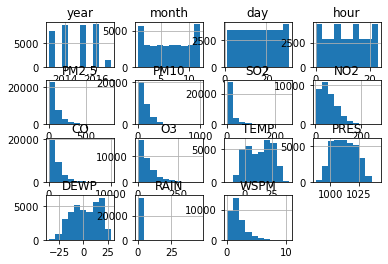

In [375]:
df_Nongzhanguan.hist()

Correlation between Variables

In [376]:
df_Nongzhanguan.corr()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
year,1.000000e+00,-2.020099e-01,-5.569082e-03,1.164482e-15,-0.023487,-0.038466,-0.176355,-0.070678,0.007034,-0.007601,-0.149289,0.174273,-0.152063,0.004298,0.027751
month,-2.020099e-01,1.000000e+00,1.052232e-02,4.724770e-16,0.030635,0.000545,-0.212145,0.062310,0.068618,-0.101102,0.133329,-0.021949,0.265961,0.016578,-0.126883
day,-5.569082e-03,1.052232e-02,1.000000e+00,-4.489555e-17,0.008837,0.028551,0.003697,0.032030,-0.011843,0.001440,0.015768,0.018361,0.019999,-0.006659,-0.009561
hour,1.164482e-15,4.724770e-16,-4.489555e-17,1.000000e+00,-0.019548,0.005268,-0.001104,-0.065971,-0.072496,0.302038,0.142301,-0.039186,-0.019672,0.005092,0.156643
PM2.5,-2.348688e-02,3.063547e-02,8.836790e-03,-1.954813e-02,1.000000,0.903852,0.536543,0.691340,0.813697,-0.187629,-0.173362,0.028121,0.097226,-0.022705,-0.301098
PM10,-3.846622e-02,5.446533e-04,2.855125e-02,5.267509e-03,0.903852,1.000000,0.524449,0.676476,0.741651,-0.160814,-0.145445,-0.002061,0.050930,-0.033133,-0.205768
SO2,-1.763547e-01,-2.121452e-01,3.697253e-03,-1.103929e-03,0.536543,0.524449,1.000000,0.502287,0.563784,-0.192710,-0.360466,0.232758,-0.265932,-0.045236,-0.155726
NO2,-7.067787e-02,6.231040e-02,3.203016e-02,-6.597082e-02,0.691340,0.676476,0.502287,1.000000,0.702669,-0.521079,-0.302299,0.129807,-0.018488,-0.051769,-0.467683
CO,7.034453e-03,6.861826e-02,-1.184336e-02,-7.249591e-02,0.813697,0.741651,0.563784,0.702669,1.000000,-0.313067,-0.317610,0.149046,-0.017588,-0.013407,-0.338262
O3,-7.601461e-03,-1.011016e-01,1.440024e-03,3.020384e-01,-0.187629,-0.160814,-0.192710,-0.521079,-0.313067,1.000000,0.609599,-0.457998,0.316142,0.024020,0.312668


## Visualization & Explanatory Analysis

### Pertanyaan 1: What is the trend of PM 2.5 in each year?

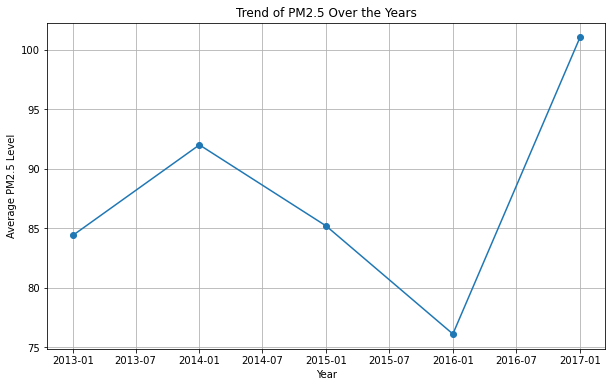

In [377]:
# Mengonversi kolom 'year' menjadi tipe data datetime untuk memudahkan analisis
df_Nongzhanguan['year'] = pd.to_datetime(df_Nongzhanguan['year'], format='%Y')

# Mengelompokkan data berdasarkan tahun dan menghitung rata-rata PM2.5 untuk setiap tahun
trend_pm25 = df_Nongzhanguan.groupby(df_Nongzhanguan['year'])['PM2.5'].mean()

# Menampilkan trend PM2.5 menggunakan plot
plt.figure(figsize=(10, 6))
plt.plot(trend_pm25.index, trend_pm25.values, marker='o')
plt.title('Trend of PM2.5 Over the Years')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Level')
plt.grid(True)
plt.show()

### Pertanyaan 2: What are the average levels of SO2, CO, NO2, and O3 when rainfall is > 0 in whole year?

In [386]:
# Filter data untuk musim hujan (RAIN > 0)
rainfall = df_Nongzhanguan[df_Nongzhanguan["RAIN"] > 0]

# Hitung rata-rata tingkat SO2, CO, NO2, dan O3
rata_rata_so2 = rainfall["SO2"].mean()
rata_rata_co = rainfall["CO"].mean()
rata_rata_no2 = rainfall["NO2"].mean()
rata_rata_o3 = rainfall["O3"].mean()

# Tampilkan hasil
print(f"Rata-rata tingkat SO2 ketika curah hujan > 0: {rata_rata_so2:.2f}")
print(f"Rata-rata tingkat CO ketika curah hujan > 0: {rata_rata_co:.2f}")
print(f"Rata-rata tingkat NO2 ketika curah hujan > 0: {rata_rata_no2:.2f}")
print(f"Rata-rata tingkat O3 ketika curah hujan > 0: {rata_rata_o3:.2f}")

Rata-rata tingkat SO2 ketika curah hujan > 0: 6.27
Rata-rata tingkat CO ketika curah hujan > 0: 1199.30
Rata-rata tingkat NO2 ketika curah hujan > 0: 42.74
Rata-rata tingkat O3 ketika curah hujan > 0: 52.84


<Figure size 864x576 with 0 Axes>

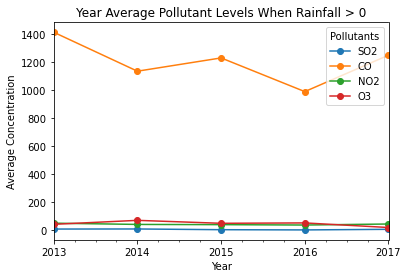

In [384]:
# Mengelompokkan data berdasarkan bulan dan menghitung rata-rata SO2, CO, NO2, dan O3
year_avg_pollutants = rainfall.groupby(rainfall['year'].dt.to_period("A"))[['SO2', 'CO', 'NO2', 'O3']].mean()

# Plotting data untuk melihat rata-rata tingkat polutan selama musim hujan
plt.figure(figsize=(12, 8))
monthly_avg_pollutants.plot(kind='line', marker='o')
plt.title('Year Average Pollutant Levels When Rainfall > 0')
plt.xlabel('Year')
plt.ylabel('Average Concentration')
plt.legend(title='Pollutants', loc='upper right')
plt.show()

### Pertanyaan 3: Is there a correlation between PM2.5 and PM10?

Correlation between PM2.5 and PM10: 0.9038520846849207


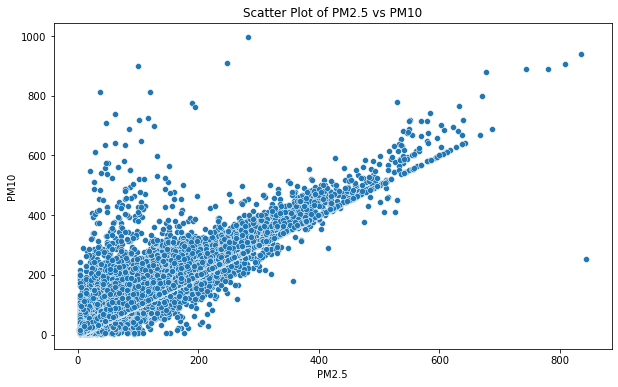

In [380]:
# Menghitung korelasi antara PM2.5 dan PM10
correlation = df_Nongzhanguan['PM2.5'].corr(df_Nongzhanguan['PM10'])

# Menampilkan nilai korelasi
print(f'Correlation between PM2.5 and PM10: {correlation}')

# Visualisasi scatter plot untuk melihat hubungan antara kedua variabel
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PM2.5', y='PM10', data=df_Nongzhanguan)
plt.title('Scatter Plot of PM2.5 vs PM10')
plt.xlabel('PM2.5')
plt.ylabel('PM10')
plt.show()

## Conclusion

- What is the trend of PM 2.5 in each year?
On trend each year is divided into 2 semesters, namely semester 1 in month 1 (January) and semester 2 in month 7 (July). It can be seen that there are fluctuations in each year. Based on the trend, it is found that the highest mean PM2.5 is in 2017 semester 1 in January. While the lowest mean PM2.5 occurred in 2016 semester 1 January.
- What are the average levels of SO2, CO, NO2, and O3 when rainfall is > 0 in each year?
It was found that the mean SO2 was 6.27, CO was 1199.30, NO2 was 42.74, and O3 was 52.84. This indicates that CO is the most abundant pollutant when rainfall > 0.
- Is there a correlation between PM2.5 and PM10?
The scatterplot shows that PM2.5 and PM10 have a positive and very strong correlation, because the values are around the line and continue to increase. This is also evidenced by the correlation value obtained, which is 0.9038520846849207 which is close to 1.